# EDA (Разведочный анализ данных)

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [31]:
df = pd.read_csv('all_data_for_ml.csv')
df = df.drop(['FileID'], axis=1)
df

,Square_QRS_frontal,Square_QRS_sagittal,Square_QRS_axial,Square_ST_frontal,Square_ST_sagittal,Square_ST_axial,Angle_QRST,Frontal_Angle_QRST,Age,EF,Gender_f,Gender_m,class
0,8.336893e-07,7.278536e-07,2.149840e-06,2.610541e-10,1.051112e-09,9.567503e-11,112.662539,41.334788,76,73,1,0,0
1,7.402612e-07,3.468231e-07,6.847881e-07,8.926697e-09,1.980139e-09,6.931836e-08,62.462055,44.982961,83,74,0,1,0
2,6.833704e-07,3.611996e-07,8.641801e-07,6.151694e-09,7.288901e-09,5.949312e-10,2.624575,9.793879,77,75,0,1,0
3,5.245667e-07,4.037455e-08,1.574025e-07,3.046258e-09,8.787343e-09,1.717640e-08,126.061398,118.078544,56,78,0,1,0
4,1.370034e-07,1.116957e-07,1.134765e-06,9.371232e-09,3.066109e-09,2.493297e-08,136.553920,166.829706,55,78,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2.882277e-07,6.787564e-07,6.910762e-07,3.220663e-09,9.055682e-09,2.478788e-08,129.570768,51.872633,68,29,0,1,1
268,2.769859e-07,1.667682e-07,2.417773e-08,4.595353e-09,2.492971e-10,2.097595e-08,130.471431,136.862002,58,29,0,1,1
269,4.595067e-07,3.152899e-07,5.008105e-07,2.863019e-08,1.049836e-08,8.825877e-08,107.037503,51.082878,59,39,0,1,1
270,1.530716e-07,3.684035e-07,4.671751e-07,9.574560e-10,3.704179e-09,3.771654e-09,157.240917,137.930779,62,33,0,1,1


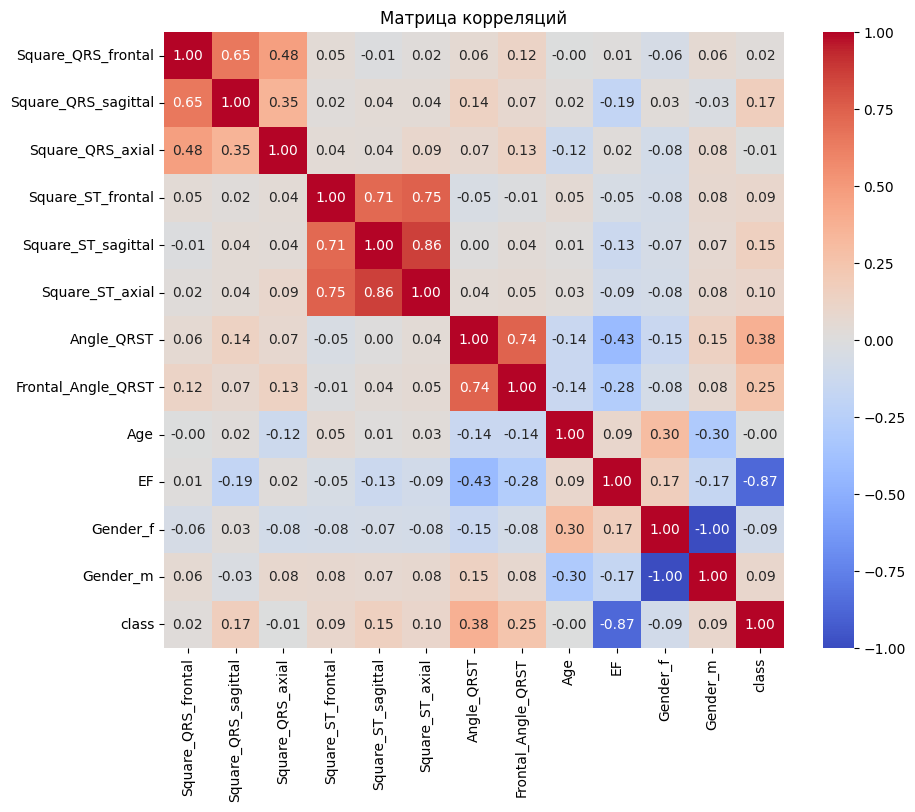

In [32]:
# Создаем тепловую карту
correlation_matrix = df[df.columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Построим scatter plot зависимости EF от остальных параметров:

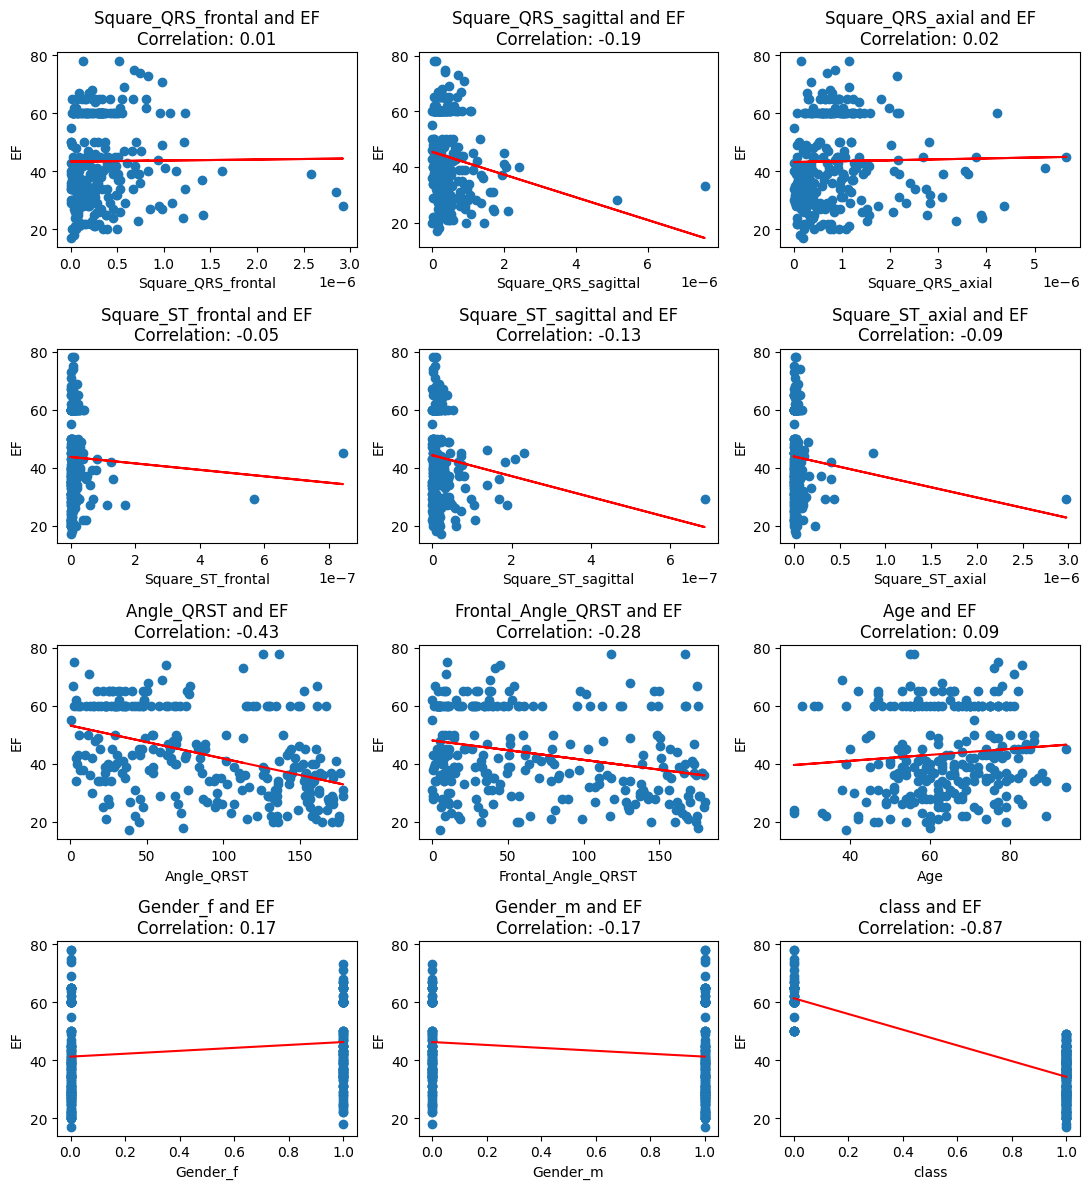

In [33]:
column_to_compare = df['EF']
df = df = df.drop(['EF'], axis=1)

# Создаем сетку графиков
num_columns = 3  # Количество столбцов в сетке
num_rows = (len(df.columns) + num_columns - 1) // num_columns  # Количество строк в сетке

fig, axes = plt.subplots(num_rows, num_columns, figsize=(11, 3 * num_rows))
axes = axes.flatten()

for idx, column in enumerate(df.columns):
    ax = axes[idx]
    ax.scatter(df[column], column_to_compare)
    
    # Вычисляем коэффициент корреляции
    correlation_coefficient, _ = pearsonr(df[column], column_to_compare)
    
    # Рисуем линию корреляции
    fit = np.polyfit(df[column], column_to_compare, 1)
    fit_fn = np.poly1d(fit)
    ax.plot(df[column], fit_fn(df[column]), color='red')
    
    ax.set_xlabel(column)
    ax.set_ylabel('EF')
    ax.set_title(f'{column} and EF\nCorrelation: {correlation_coefficient:.2f}')

plt.tight_layout()
plt.show()


Интересно проверить какова значимость параметра угол QRST. Корреляцию с EF посчитали (-0.42) а проведем статистический тест с признаком class:

Для проверки нормальности данных можно использовать тест Шапиро-Уилка, который позволяет оценить, насколько сильно распределение отличается от нормального. Если p-value теста меньше уровня значимости (обычно 0.05), то гипотеза о нормальности данных отвергается.

Если данные проходят тест на нормальность, то можно использовать t-тест Стьюдента для сравнения средних значений Angle_QRST в классах 0 и 1.

Если данные не проходят тест на нормальность, то можно использовать непараметрический тест Манна-Уитни для сравнения значений Angle_QRST в классах 0 и 1.

In [40]:
# Для класса патологии
stat, p = shapiro(df[df['class']==1]['Angle_QRST'])

print('Statistics=%.3f, p-value=%.5f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.921, p-value=0.00000
Sample does not look Gaussian (reject H0)


In [41]:
# Для класса нормы
stat, p = shapiro(df[df['class']==0]['Angle_QRST'])

print('Statistics=%.3f, p-value=%.5f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.871, p-value=0.00000
Sample does not look Gaussian (reject H0)


In [39]:
stat, p = mannwhitneyu(df[df['class']==1]['Angle_QRST'], df[df['class']==0]['Angle_QRST'])

print('Statistics=%.2f, p-value=%.5f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Are equal (fail to reject H0)')
else:
    print('Are different (reject H0)')

Statistics=12130.00, p-value=0.00000
Are different (reject H0)
